In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error
import shap  # library for explaining model predictions

In [ ]:
# Load the prepared dataset
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')

In [3]:
data_fin_imprt.head(15)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,7.581210,1960,4.727388,6.461468,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,...,False,False,False,True,False,False,False,False,True,False
2,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,4.543295,9.320181,7,1.791759,7.585281,1968,0.000000,6.971669,0.000000,...,False,False,False,True,False,False,False,False,True,False
4,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,...,False,False,False,True,False,False,False,False,True,False
5,4.110874,4.369448,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,...,False,False,False,True,False,False,False,False,True,False
6,4.795791,3.737670,8.501267,8,1.791759,7.601902,2001,0.000000,6.424869,0.000000,...,False,False,False,True,False,False,False,False,True,False
7,4.795791,3.784190,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,...,False,False,False,True,False,False,False,False,True,False
8,4.795791,3.688879,8.592301,8,1.791759,7.598900,1996,0.000000,7.074117,0.000000,...,False,False,False,True,False,False,False,False,True,False
9,4.110874,4.110874,8.922792,7,1.791759,7.600902,1999,0.000000,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# Split data into features and target, then create train/test split
x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train the basic MLP model
mlp_model = MLPRegressor(random_state=1, max_iter=500)
mlp_model.fit(x_train, y_train)
mlp_model_predict = mlp_model.predict(x_test)

In [6]:
Lin_lasso_mod_sc=mlp_model.score(x_train,y_train)#best '1'
print('Multilayer Perceptron Regression Model Score  : ',round(Lin_lasso_mod_sc,3))
r2=r2_score(y_test,mlp_model_predict)# computing and displaying the R.Sq of the model, best 'above0.9'
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)#0.8+
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,mlp_model_predict)# computing and displaying the Mean square error of the model, best 0
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,mlp_model_predict,squared = False)#best 0
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, mlp_model_predict)#best 0
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(mlp_model, x, y,scoring='r2' ,cv=5) #best 100
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of moadel based on parameter supplied by GridsearchCV

Multilayer Perceptron Regression Model Score  :  -2.843
R Sq. Value :  -2.73
Adjusted R Sq. Value is :  -3.122
Mean Square Error is :  0.69
Root Mean Square Error is :  0.831
Mean Absoulue Error is :  0.608
Accuracy : -269.86 %


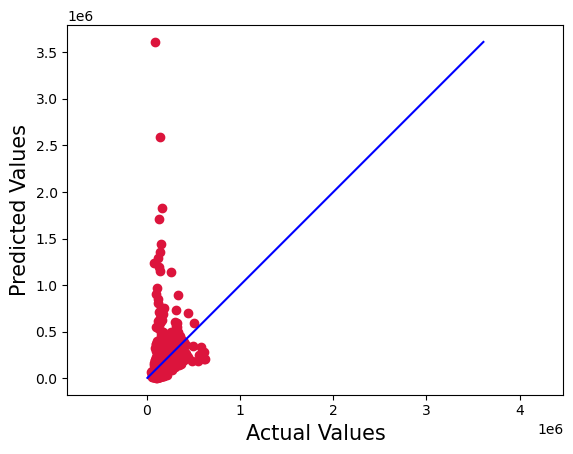

In [ ]:
# Plot actual vs predicted prices (convert from log scale back to dollars)
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(mlp_model_predict)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


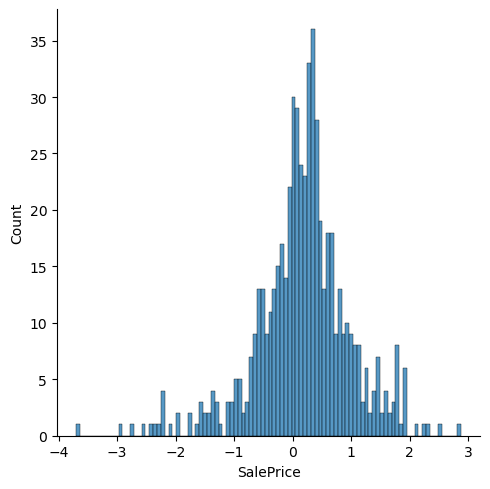

In [ ]:
# Plot distribution of residuals
sb.displot((y_test-mlp_model_predict),bins=100); 

In [ ]:
# Define hyperparameters for grid search
param_list = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver":\
     ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

In [10]:
G_CV_lin_rid = GridSearchCV(estimator=mlp_model, param_grid=param_list, cv= 5) #  using grid search method to optimise model with hyperparameter tuning

G_CV_lin_rid.fit(x_train, y_train)# fitting the model
G_CV_lin_rid.best_params_ # displaying optimised parameters for optimal tuning of model

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

{'activation': 'identity',
 'alpha': 5e-05,
 'hidden_layer_sizes': (1,),
 'solver': 'lbfgs'}

{'activation': 'tanh',
 'alpha': 5e-05,
 'hidden_layer_sizes': (50,),
 'solver': 'lbfgs'}

In [ ]:
# Retrain model with optimized hyperparameters
mlp_model = MLPRegressor(random_state=1, max_iter=500 ,activation='tanh', hidden_layer_sizes=50, solver='lbfgs',alpha=5e-05)
mlp_model.fit(x_train, y_train)
mlp_model_predict = mlp_model.predict(x_test)

In [12]:
mlp_mod_sc=mlp_model.score(x_train,y_train)#best '1'
print('Multilayer Perceptron Regression Model Score  : ',round(mlp_mod_sc,3))
r2=r2_score(y_test,mlp_model_predict)# computing and displaying the R.Sq of the model, best 'above0.9'
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)#0.8+
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,mlp_model_predict)# computing and displaying the Mean square error of the model, best 0
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,mlp_model_predict,squared = False)#best 0
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, mlp_model_predict)#best 0
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(mlp_model, x, y,scoring='r2' ,cv=5) #best 100
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of moadel based on parameter supplied by GridsearchCV

Multilayer Perceptron Regression Model Score  :  0.0
R Sq. Value :  -0.01
Adjusted R Sq. Value is :  -0.117
Mean Square Error is :  0.187
Root Mean Square Error is :  0.433
Mean Absoulue Error is :  0.339
Accuracy : -1.07 %


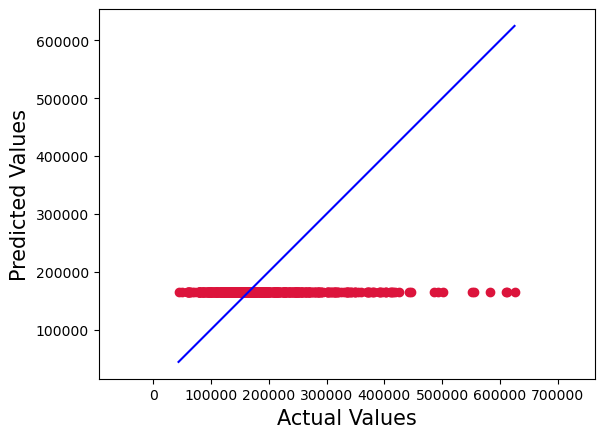

In [ ]:
# Plot actual vs predicted prices (convert from log scale back to dollars)
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(mlp_model_predict)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


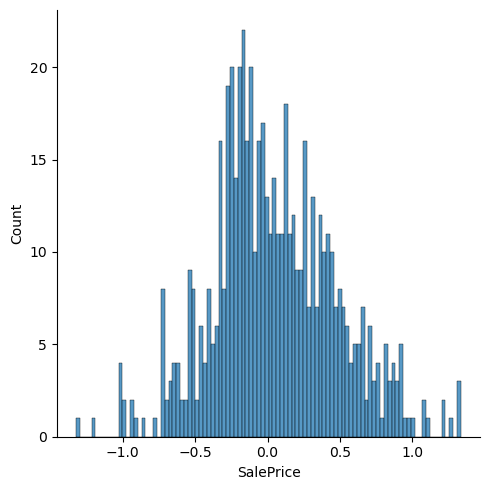

In [ ]:
# Plot distribution of residuals
sb.displot((y_test-mlp_model_predict),bins=100); 